<a href="https://colab.research.google.com/github/luisbisaro/pandas.datasets/blob/main/C3_Luis_Bisaro_TRABAJO_INTEGRADOR_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/10C5ieMYrUzzmz08L7HKbpOAUDG_HDneB?usp=sharing

# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

###Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

----

----
*Apellido, Nombre, DNI, email de todos los integrantes del grupo*

### Bisaro, Luis

### Dni 21877661

### luisbisaro@gmail.com
----

----
## Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción

----

------------------------
#### Utilizo el dataset de los correos categorizados como Spam o Ham, que es una forma coloquial utilizada para designar los correos "basura" (spam) y los correos que son útiles (ham).

#### En base al estudio realizado previamente, el dataset esta etiquetado con la caracteristica antes mencionada, lo que nos es útil para el desarrollo de procesos de machine learning supervisados. Y como consecuencia, poder predecir en otros datasets, si el correo es spam o no.

#### En la seccion de Analisis exploratorio, se utilizan las funciones para obtener datos del dataset, tambien se adjuntan graficos de algunas caracteristicas.

#### Tambien en los resultados de las metricas, se incluyen en la misma seccion donde se codifico el metodo.
---------------------------------



_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter

from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import warnings

# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

#cargar el data set en un dataframe
spam_df = pd.read_csv('https://raw.githubusercontent.com/luisbisaro/pandas.datasets/main/integrador/spam.csv')

#spam_df


##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).

In [ ]:
spam_df.columns = ['Categoria', 'Mensaje']
## cambio el nombre de las columnas
spam_df.head()

,Categoria,Mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_df.head()
## vemos las primeras filas del dataset

,Categoria,Mensaje
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
spam_df.info()
## aca podemos ver caracteristicas del dataset, las columnas y la cantidad de datos que poseen
## el data set posee 2 columnas (categoria y mensaje) y  5572 filas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Categoria  5572 non-null   object
 1   Mensaje    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
spam_df.describe()
## esta funcion nos muestra un resumen de las varibles , en este caso al ser la variable message del tipo categoria, nos muestra la cantidad de varlores distintos
## y para la variable category, nos muestra que tiene dos valores unicos, estos serian ham y spam.

,Categoria,Mensaje
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
spam_df.isnull().sum()
## verifico que no haya datos nulos

Categoria    0
Mensaje      0
dtype: int64

In [ ]:
spam_df.groupby('Categoria').describe()
## agrupando por valores de la primera columna, vemos que tenemos 4825 datos etiquetados como "ham" y 747 como "spam"


Mensaje                                                            \
            count unique                                                top   
Categoria                                                                     
ham          4825   4516                             Sorry, I'll call later   
spam          747    641  Please call our customer service representativ...   

                
          freq  
Categoria       
ham         30  
spam         4

<Axes: xlabel='Categoria', ylabel='count'>

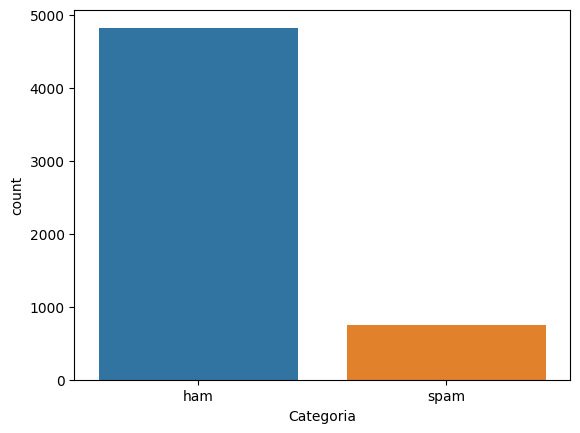

In [ ]:
sns.countplot(x = "Categoria", data = spam_df)
## grafico de la frecuencia absoluta de cada categoria

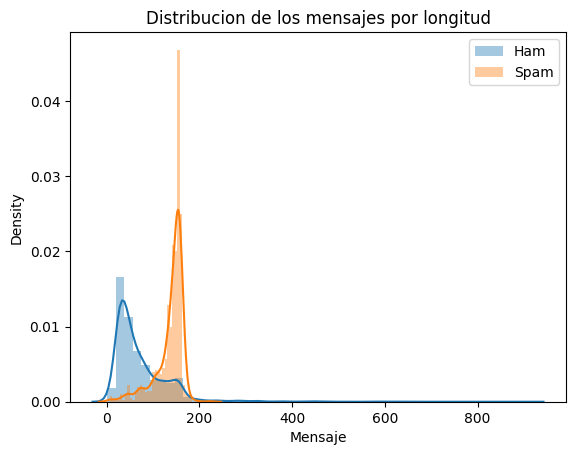

In [ ]:
ham =spam_df[spam_df['Categoria'] == 'ham']['Mensaje'].str.len()
sns.distplot(ham, label='Ham')
spam = spam_df[spam_df['Categoria'] == 'spam']['Mensaje'].str.len()
sns.distplot(spam, label='Spam')
plt.title('Distribucion de los mensajes por longitud')
plt.legend()

In [ ]:
count1 = Counter(" ".join(spam_df[spam_df['Categoria']=='ham']["Mensaje"]).split()).most_common(30)
data1 = pd.DataFrame.from_dict(count1)
data1 = data1.rename(columns={0: "words of ham", 1 : "count"})
count2 = Counter(" ".join(spam_df[spam_df['Categoria']=='spam']["Mensaje"]).split()).most_common(30)
data2 = pd.DataFrame.from_dict(count2)
data2 = data2.rename(columns={0: "words of spam", 1 : "count_"})

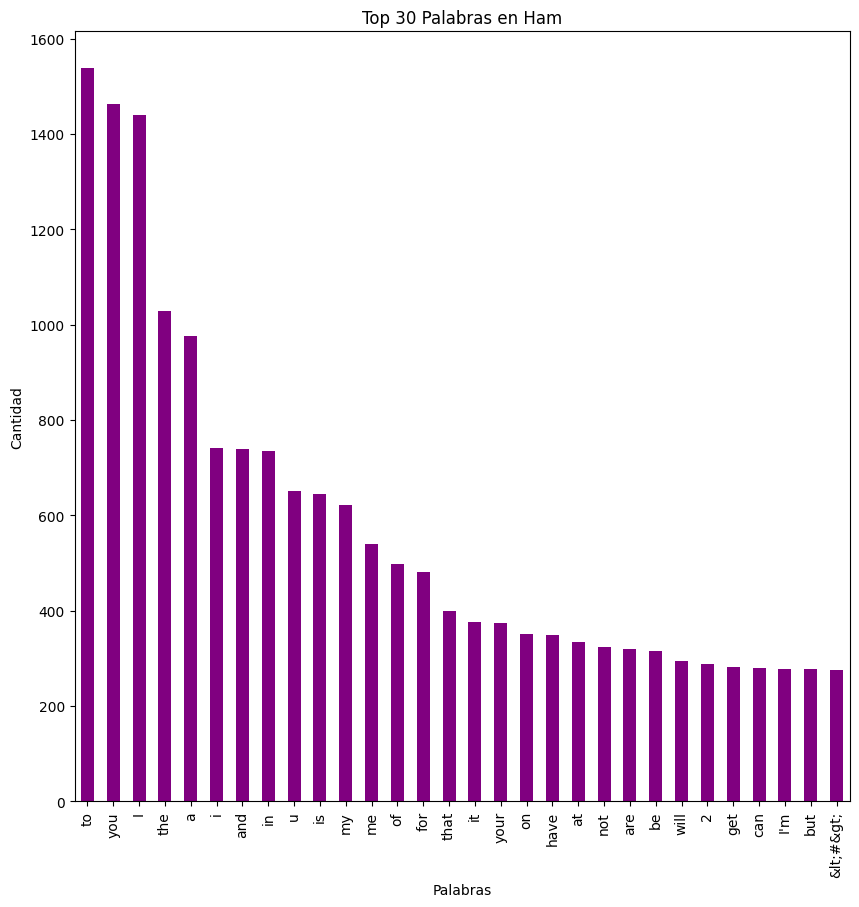

In [ ]:
#Graph for top 30 words of ham
data1.plot.bar(legend = False, color = 'purple',figsize = (10,10))
y_pos = np.arange(len(data1["words of ham"]))
plt.xticks(y_pos, data1["words of ham"])
plt.title('Top 30 Palabras en Ham')
plt.xlabel('Palabras')
plt.ylabel('Cantidad')
plt.show()

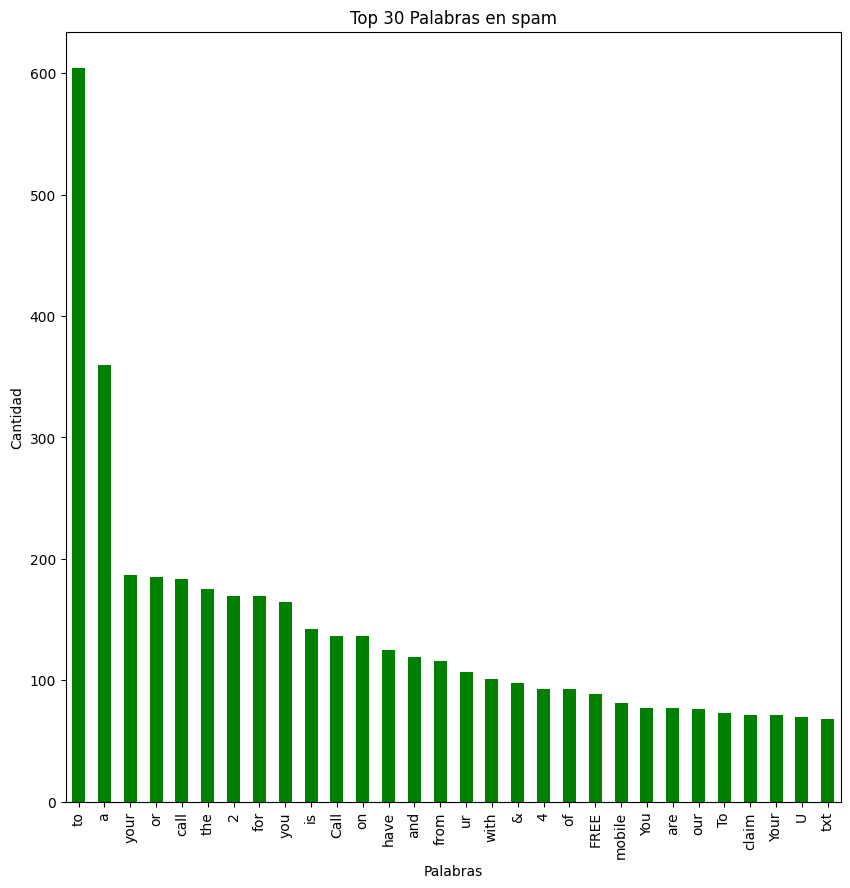

In [ ]:
#Graph for top 30 words of spam
data2.plot.bar(legend = False, color = 'green', figsize = (10,10))
y_pos = np.arange(len(data2["words of spam"]))
plt.xticks(y_pos, data2["words of spam"])
plt.title('Top 30 Palabras en spam')
plt.xlabel('Palabras')
plt.ylabel('Cantidad')
plt.show()

##3- Aplicar PROCESO DE LIMPIEZA

In [ ]:
# no es necesario en este dataset

---------
# Regresion Logistica
-----------

In [ ]:
#use '1' for spam and '0' for not spam
## se cambia la variable categoria por un numero para poder calcular las metricas.
spam_df['Categoria'] = spam_df.Categoria.map({'ham':0, 'spam':1})
spam_df.head()

,Categoria,Mensaje
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## division del dataset en los dataset de entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(spam_df['Mensaje'],spam_df['Categoria'], test_size =0.2, random_state=1)

print('Number of rows in the total set: {}'.format(spam_df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

from sklearn.feature_extraction.text import CountVectorizer

count_vector = CountVectorizer()
# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train).toarray()

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test).toarray()
frequency_matrix = pd.DataFrame(training_data, columns = count_vector.get_feature_names_out())
print(frequency_matrix.head())

clf = LogisticRegression(random_state=30).fit(training_data, y_train)    ## este es el nombre del modelo

#predict the value
predictions = clf.predict(testing_data)

predictions




Number of rows in the total set: 5572
Number of rows in the training set: 4457
Number of rows in the test set: 1115
   00  000  008704050406  0121  01223585236  01223585334  0125698789  02  \
0   0    0             0     0            0            0           0   0   
1   0    0             0     0            0            0           0   0   
2   0    0             0     0            0            0           0   0   
3   0    0             0     0            0            0           0   0   
4   0    0             0     0            0            0           0   0   

   0207  02072069400  ...  zed  zeros  zhong  zindgi  zoe  zoom  zouk  zyada  \
0     0            0  ...    0      0      0       0    0     0     0      0   
1     0            0  ...    0      0      0       0    0     0     0      0   
2     0            0  ...    0      0      0       0    0     0     0      0   
3     0            0  ...    0      0      0       0    0     0     0      0   
4     0            0  ...  

array([0, 0, 0, ..., 0, 0, 0])

Accuracy score:  0.9874439461883409
Precision score:  0.9925925925925926
Recall score:  0.9115646258503401
F1 score:  0.9503546099290779

Confusion Matrix :
 [[967   1]
 [ 13 134]]


<Axes: >

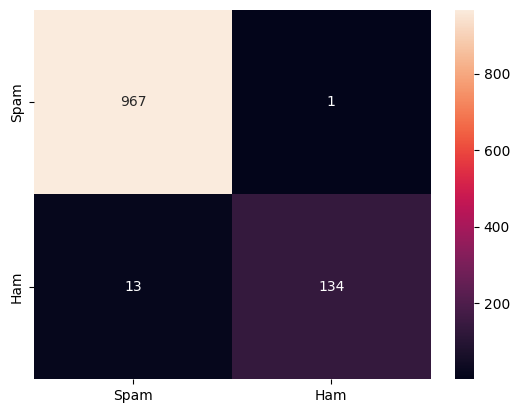

In [ ]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, predictions))

#print (metrics.classification_report(y_test, predictions,target_names=["Spam","Ham"]))


## grafico de la matriz de confusion
from sklearn import metrics
array = metrics.confusion_matrix(y_test, predictions)
df_cm = pd.DataFrame(array, ["Spam","Ham"],["Spam","Ham"])
sns.heatmap(df_cm, annot=True , fmt=".0f")

------------
# KNC
---------------

In [ ]:
## KNeighbors Classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(spam_df['Mensaje'], spam_df['Categoria'], test_size = 0.3, random_state = 37)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))


corpus = []
for i in range(0, 5572):
    review = re.sub('[^a-zA-Z]', ' ', spam_df['Mensaje'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

cv = CountVectorizer(max_features = 1500)
cv.fit(X_train)

X_train_cv = cv.transform(X_train)
X_train_cv

X_test_cv = cv.transform(X_test)
X_test_cv

knc = KNeighborsClassifier(n_neighbors=100)
knc.fit(X_train_cv,y_train)

y_knc = knc.predict(X_test_cv)

print('KNeighbors Accuracy_score: ',accuracy_score(y_test,y_knc))

print('KNeighbors confusion_matrix: \n', confusion_matrix(y_test, y_knc))


X_train:  3900
X_test:  1672
y_train:  3900
y_test:  1672
KNeighbors Accuracy_score:  0.8564593301435407
KNeighbors confusion_matrix: 
 [[1432    0]
 [ 240    0]]


----
# Regresion usando otra forma
-----

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

#spam_df.loc[spam_df['Category'] == 'spam', 'Category',] = 0
#spam_df.loc[spam_df['Category'] == 'ham', 'Category',] = 1

X = spam_df['Mensaje']

Y = spam_df['Categoria']

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

print(X.shape)
print(X_train.shape)
print(X_test.shape)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')



(5572,)
(4457,)
(1115,)


Accuracy on test data :  0.9659192825112107


<Axes: >

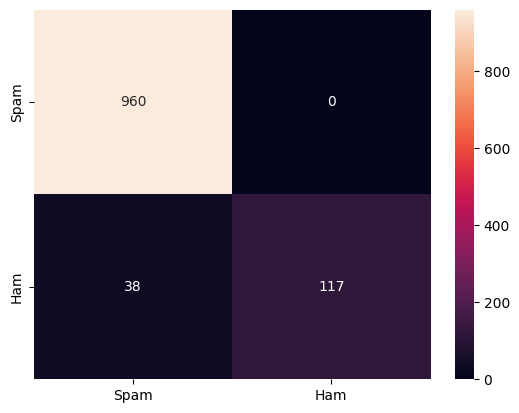

In [ ]:
model = LogisticRegression()
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

from sklearn import metrics
array = metrics.confusion_matrix(Y_test, prediction_on_test_data)
df_cm = pd.DataFrame(array, ["Spam","Ham"],["Spam","Ham"])
sns.heatmap(df_cm, annot=True , fmt=".0f")


In [ ]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[0]
Spam mail


In [ ]:
#guardo modelo
import joblib
joblib.dump(clf, 'email_spam_model.pkl')

# k fold   https://www.kaggle.com/code/chiffonng/sms-spam-detection-nb-rf-svm/notebook

['email_spam_model.pkl']

---------------
# esto no lo hice
##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.
--------------


Presentemos primero las principales métricas de clasificación usadas en Machine Learning:

* Matriz de confusión o error
* Precisión
* Recall o sensibilidad o TPR (Tasa positiva real)
* Precisión
* Especificidad o TNR (Tasa negativa real)
* F1-Score
* Área bajo la curva de funcionamiento del receptor (ROC) (AUC)
* Pérdida logarítmica
* Cohen’s Kappa





##6- Sacar una conclusión en función de los resultados, errores, y predicciones.

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.